<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [ ]:
!pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy==1.22.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import numpy as np
import copy
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Make graph
G = nx.read_edgelist("out.dbpedia-similar",comments='%',nodetype = int
                     ,create_using=nx.Graph())
G.remove_edges_from(nx.selfloop_edges(G))
print(G)

Graph with 430 nodes and 564 edges


In [ ]:
# Check for dublicates
def sort_edges(edges):  
  new_edges = []
  for idx,(u,v) in enumerate(edges):
    if u < v:
      new_edges.append((u,v))
    if u > v and not (v,u) in new_edges:
      new_edges.append((v,u))
  return new_edges

In [ ]:
# Remove dublicates and sort edges
new_edges = sort_edges(list(G.edges))
# Check if number of edges are different
print(len(new_edges) == len(list(G.edges)))
print("Graph with no dublicates: {}".format(G))

True
Graph with no dublicates: Graph with 430 nodes and 564 edges


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [ ]:
# Graph information
initial_node_count= G.number_of_nodes()  
initial_edge_count = G.number_of_edges() 

initial_connected_components= len(list(nx.connected_components(G)))
mean_degree = mean([i[1] for i in G.degree])

print("There are {} nodes, {} edges.".format(initial_node_count,
                                             initial_edge_count),
"Also, there are {} connected components".format(
    initial_connected_components),
"and the mean degree of the nodes is {}".format(mean_degree))

There are 430 nodes, 564 edges. Also, there are 95 connected components and the mean degree of the nodes is 2.6232558139534885


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [ ]:
# Find unconnected pairs
non_edges = list(nx.non_edges(G))

count_unconnected_pairs = len(non_edges)

print('There are {} unconnected pairs on the graph.'.format(
    count_unconnected_pairs))

There are 91671 unconnected pairs on the graph.


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [ ]:
# removable edges
removable_edges = []
G_copy = copy.deepcopy(G)
for edge in G.edges:
  G_copy_check = copy.deepcopy(G_copy)
  G_copy_check.remove_edge(*edge)
  #  Check splitting and number of nodes
  if (len(list(nx.connected_components(G_copy_check)))  
  == initial_connected_components) and (G_copy_check.number_of_nodes() 
  == initial_node_count):
    removable_edges.append((int(edge[0]),int(edge[1])))
    G_copy = G_copy_check

count_removable_edges = len(removable_edges)
print("There are {} removable nodes".format(count_removable_edges))

There are 229 removable nodes


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [ ]:
# (va) Compine unconnected and removables edges
all_edges = copy.deepcopy(removable_edges)
all_edges.extend(non_edges)
links = np.concatenate((np.ones((count_removable_edges)),np.zeros((count_unconnected_pairs))))

# sort nodes
all_edges, links = (list(t) for t in zip(*sorted(zip(all_edges, links))))

df = pd.DataFrame({'edge':all_edges,'link':links})

In [ ]:
# (vb) Graph with removables edges removed
new_G = copy.deepcopy(G)
new_G.remove_edges_from(removable_edges)

In [ ]:
# (vc) Graph information
new_G_node_count= new_G.number_of_nodes()  
new_G_edge_count = new_G.number_of_edges() 

new_G_connected_components = len(list(nx.connected_components(new_G)))
new_G_mean_degree = mean([i[1] for i in new_G.degree])

print("There are {} nodes, {} edges.".format(new_G_node_count,
                                             new_G_edge_count),
"Also, there are {} connected components".format(
    new_G_connected_components),
"and the mean degree of the nodes is {}".format(new_G_mean_degree))

There are 430 nodes, 335 edges. Also, there are 95 connected components and the mean degree of the nodes is 1.558139534883721


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [ ]:
# Check for dublicates
def sort_edges_df(df_edges,col_name):  
  new_edges = []
  new_link = []
  for idx,(u,v) in enumerate(df_edges['edge']):
    if u < v:
      new_edges.append((u,v))
      new_link.append(df_edges.loc[idx][col_name])
    if u > v and not (v,u) in new_edges:
      new_edges.append((v,u))
      new_link.append(df_edges.loc[idx][col_name])
  
  # sort nodes
  new_edges, new_link = (list(t) for t in zip(*sorted(
      zip(new_edges, new_link))))

  new_df = pd.DataFrame({'edge':new_edges,col_name:new_link})
  return new_df

# Calculate Jaccard Coefficcient, Preferential Αttachment and
# Resource Allocation
def calc_metric(graph,df,method,col_name):
  metr = list(method(graph))
  edge_list = [(u,v) for u,v,_ in metr]
  metr_list = [j for _,_,j in metr]
  df = pd.DataFrame({'edge':edge_list,col_name:metr_list})
  df = sort_edges_df(df,col_name)
  return df

# Calculate performance with percision, recall and accuracy
def performance(TP,TN,FP,FN):
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  accuracy = (TP+TN)/(TP+FN+TN+FP)
  print('Percision is: {}'.format(precision))
  print('Recall is: {}'.format(recall))
  print('Accuracy is: {}'.format(accuracy))
  return precision, recall, accuracy

In [ ]:
k = 4

# 2(i) Calculate Jaccard Coefficient
jc_df = calc_metric(new_G,df,nx.jaccard_coefficient,'JC')

# Sort dataframe based on nodes and remove dublicates
df = sort_edges_df(df,'link')
# jc_df = sort_edges_df(jc_df,'JC')

# 2(ii) 4th highest values of JC
print('K edges with highest JC:')
print(jc_df.nlargest(n=k, columns=['JC']))

K edges with highest JC:
          edge   JC
1321   (4, 46)  1.0
1322   (4, 47)  1.0
1324   (4, 49)  1.0
9181  (23, 34)  1.0


With limit 0.1 the results are:
[[  162   343]
 [   67 91328]]
Percision is: 0.3207920792079208
Recall is: 0.7074235807860262
Accuracy is: 0.9955386289445048
------------------------
With limit 0.15 the results are:
[[  158   329]
 [   71 91342]]
Percision is: 0.324435318275154
Recall is: 0.6899563318777293
Accuracy is: 0.9956474428726877
------------------------
With limit 0.25 the results are:
[[  155   293]
 [   74 91378]]
Percision is: 0.34598214285714285
Recall is: 0.6768558951965066
Accuracy is: 0.996006528835691
------------------------
With limit 0.5 the results are:
[[  138   193]
 [   91 91478]]
Percision is: 0.4169184290030212
Recall is: 0.6026200873362445
Accuracy is: 0.9969096844396083
------------------------
With limit 1.0 the results are:
[[  126   121]
 [  103 91550]]
Percision is: 0.5101214574898786
Recall is: 0.5502183406113537
Accuracy is: 0.9975625680087051
------------------------


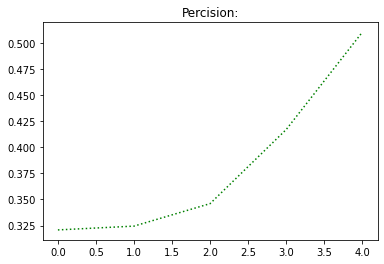

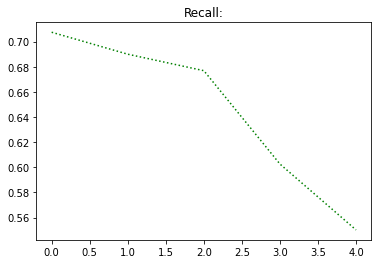

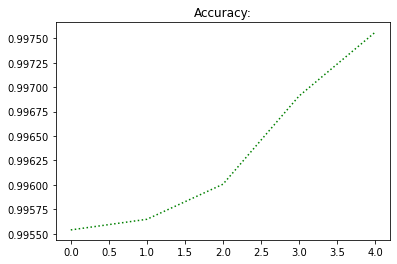

In [ ]:
# 2(iii)
limits = [0.1, 0.15, 0.25, 0.5, 1.0]
merged_df = pd.merge(df, jc_df, on ='edge')
all_per = []
all_rec = []
all_acc = []
for limit in limits:

  # Calculate true/false negative/positive values
  TP = merged_df[(merged_df['JC']>=limit) & 
                 (merged_df['link']==1.0)].shape[0]
  TN = merged_df[(merged_df['JC']<limit) & 
                 (merged_df['link']==0.0)].shape[0]
  FP = merged_df[(merged_df['JC']>=limit) & 
                 (merged_df['link']==0.0)].shape[0]
  FN = merged_df[(merged_df['JC']<limit) & 
                 (merged_df['link']==1.0)].shape[0]
  print('With limit {} the results are:'.format(limit))  
  
  # Confussion matrix  
  print(np.array([[TP, FP], [FN,TN]]))

  # Calculate precision, recall accuracy
  per,rec,acc = performance(TP,TN,FP,FN)
  print("------------------------")
  all_per.append(per)
  all_rec.append(rec)
  all_acc.append(acc)



# Plot previous metrics
plt.title("Percision:")
plt.plot(all_per, linestyle = 'dotted',color = 'g')
plt.show()
plt.title("Recall:")
plt.plot(all_rec, linestyle = 'dotted',color = 'g')
plt.show()
plt.title("Accuracy:")
plt.plot(all_acc, linestyle = 'dotted',color = 'g')
plt.show()

Η μετρική Jaccard coefficient με κατώφλι φαίνεται πολύ αποτελεσματική στην πρόβλεψη μη ύπαρξης ακμής (TN>>FN). Παρ' όλα αυτά στην πρόβλεψη ύπαρξης ακμής τα αποτελέσματα είναι απογοητευτικά καθώς σε σχεδόν όλες τις τιμές κατωφλίου (εκτός από την τιμή 1) ισχύει ότι FP>TP που σημαίνει ότι δεν είναι αξιόπιστη μέθοδος πρόβλεψης. Προφανώς το accuracy είναι αρκετά μεγάλο αφού ο αριθμητής περιέχει και το TP και το TN, ενώ οι άλλες δύο μετρικές, το percision και το recall έχουν μικρότερες τιμές. Συγκεκριμένα το μικρότερο από τα δύο είναι το percision γιατί ο παρονομαστής περιέχει άθροισμα με το FP που είναι αρκετά μεγάλο σε σχέση με τον αριθμητή (TP). 

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

3(i) Γενικά υπάρχουν διάφορες μετρικές που υπολογίζουν την συσχέτιση δύο μεταβλητών όπως για παράδειγμα οι συντελεστές Pearson, Spearman's Rank ή Kendall Tau που είναι οι πιο γνωστοί για εύρεση γραμμικής συσχέτισης. Είναι σημαντικό να εξετασθεί η συσχέτιση των χαρακτηριστικών ενός μοντέλου, καθώς όσο περισσότερες διαστάσεις τόσο πιο δύσκολο είναι να γίνει σωστή εκπαίδευση στα δεδομένα (διαστατικότητα). Αν λοιπόν υπάρχει συσχέτιση τότε μπορεί να αφαιρεθεί μια ή περισσότερες μεταβλητές και να γίνει καλύτερη εκπαίδευση ενός μοντέλου ML. Μια εύκολη λύση μιας και τα χαρακτηριστικά μας θα βρεθούν σε dataframe είναι η χρήση της συνάρτησης pandas.DataFrame.corr() στην οποία μάλιστα μπορεί να επιλεχθεί εύκολα όποια απο τις τρεις μετρικές που αναφέρθηκαν προηγουμένως θέλουμε να χρησιμοποιήσουμε. 

In [ ]:
# 3(ii) replicate of the dataframe "unconnected+removables"---dataframe 
# will be used again in (4)
df_metrics = copy.deepcopy(merged_df)

# Calculate Preferential Attachment and Resource Allocation
pa_df = calc_metric(new_G,df_metrics,nx.preferential_attachment,'PA')
ra_df = calc_metric(new_G,df_metrics,nx.resource_allocation_index,'RA')

# Dataframe for similarity-based measurement values 
# Merge the three metrics in one Dataframe
df_metrics = pd.merge(pd.merge(df_metrics,pa_df,on='edge'),ra_df,on='edge')

<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix

In [ ]:
# 3(iiia) X and y sets
X = df_metrics[['JC','PA','RA']].to_numpy() #features
y = df_metrics['link'].to_numpy() #target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# Fit Scaler and transform train and test set
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

# Select classifier and estimate best parameters
classifier = RandomForestClassifier()
parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [ ]:
model.fit(X_train_scaled,y_train) #train the model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [ ]:
# 3(iiib) Get predictions
predictions = model.predict(X_test_scaled)  
predictions[0:k] #get (A.M. last digit) first predictions
print('First 4 predictions')
for i in range(0,k):
  print('Prediction {} with true label {}.'.format(predictions[i],y_test[i]))

# Find model accuracy
ml_mod_acc =  accuracy_score(y_test, predictions)
print('The accuracy of the model is {}'.format(ml_mod_acc))

First 4 predictions
Prediction 0.0 with true label 0.0.
Prediction 0.0 with true label 0.0.
Prediction 0.0 with true label 0.0.
Prediction 0.0 with true label 0.0.
The accuracy of the model is 0.998911860718172


In [ ]:
# 3(iiic) Prediction of exixtance of (1,47) edge
test = mm_scaler.transform(df_metrics[df_metrics['edge']==(1,47)]
                           [['JC','PA','RA']].to_numpy())
predict_proba = model.predict_proba(test)
print('The propability (1,47) edge to be connected is {}. (Class 0)'.
      format(predict_proba[0,0]))
print('The propability (1,47) edge to not be connected is {}. (Class 1)'.
      format(predict_proba[0,1]))
print('Link label of (1,47) is {}'.format(int(df_metrics[
    df_metrics['edge']==(1,47)][['link']].to_numpy())))

The propability (1,47) edge to be connected is 0.9997319133504258. (Class 0)
The propability (1,47) edge to not be connected is 0.0002680866495742985. (Class 1)
Link label of (1,47) is 0


In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[22915     1]
 [   24    35]]


Παρατηρούμε ότι το dataset δεν είναι ισορροπημένο. Αυτό είναι αναμενώμενο να επηρεάσει οποιοδήποτε μοντέλο πρόβλεψης. Ως αποτέλεσμα το μοντέλο προέβλεψε σχεδόν τέλεια τις μη υπάρχουσες ακμές όμως επίσης ταξινόμιησε μεγάλο ποσοστό των υπάρχουσων ακμών λανθασμένα. Ωστόσο, βλέπουμε μια βελτίωση σε σχέση με την προηγούμενη τεχνική (TP>FP).

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
!pip install node2vec==0.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from node2vec import Node2Vec  
import multiprocessing         

In [ ]:
#generate walks
node2vec_walker = Node2Vec(new_G,dimensions=128 ,p=1 ,q=1,num_walks=10,
                           walk_length=80, 
                           workers=multiprocessing.cpu_count())

#train node2vec model
n2v_model = node2vec_walker.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Create copy of previous dataframe and split nodes from the edge 
# to different column
df_with_target_var = copy.deepcopy(df)
df_with_target_var[["node_1","node_2"]] = df_with_target_var[
    'edge'].apply(pd.Series)

# apply trained Node2Vec model on each node pair of the dataframe 
# "unconnected+removables"
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) 
for i,j in zip(df_with_target_var['node_1'],
               df_with_target_var['node_2'])]

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(
    x, df_with_target_var['link'], random_state = 0)

In [ ]:
# Create and fit classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)  

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Get predictions
predictions = classifier.predict(X_test)  

# Find model accuracy
nod2vec_mod_acc =  accuracy_score(y_test, predictions)
print('The accuracy of the model is {}'.format(nod2vec_mod_acc))

The accuracy of the model is 0.9987377584330794


In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[22916     0]
 [   29    30]]


Τα αποτελέσματα είναι παρόμοια με το προηγούμενο μοντέλο, με την μικρή διαφορά ότι προέβλεψε τέλεια την μη ύπαρξη (FN = 0). 

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>

In [ ]:
from node2vec.edges import AverageEmbedder,HadamardEmbedder
from node2vec.edges import WeightedL1Embedder, WeightedL2Embedder

In [ ]:
# Train random forest model with specific learning operator for nod2vec
def train_with_operator(n2v_model,method,df_with_target_var):
  # Use specific binary operators
  method_embs = method(keyed_vectors=n2v_model.wv)
  x = [method_embs[(str(i),str(j))] for i,j in zip(
      df_with_target_var['node_1'], df_with_target_var['node_2'])]

  X_train, X_test, y_train, y_test = train_test_split(
      x, df_with_target_var['link'], random_state = 0)
  classifier = RandomForestClassifier(max_depth=2, random_state=0) 
  classifier.fit(X_train,y_train) 

  # Get predictions
  predictions = classifier.predict(X_test) 

  # Find model accuracy
  nod2vec_mod_acc =  accuracy_score(y_test, predictions)
  print('The accuracy of the model is {}'.format(nod2vec_mod_acc))

  # Confusion matrix
  cf_matrix = confusion_matrix(y_test, predictions)
  print(cf_matrix)

In [ ]:
print('Average operator results:')
print("------------------------")
train_with_operator(n2v_model,AverageEmbedder,df_with_target_var)
print("------------------------")
print('Hadamard operator results:')
print("------------------------")
train_with_operator(n2v_model,HadamardEmbedder,df_with_target_var)
print("------------------------")
print('Weighted-L1 operator results:')
print("------------------------")
train_with_operator(n2v_model,WeightedL1Embedder,df_with_target_var)
print("------------------------")
print('Weighted-L2 operator results:')
print("------------------------")
train_with_operator(n2v_model,WeightedL2Embedder,df_with_target_var)
print("------------------------")

Average operator results:
------------------------
The accuracy of the model is 0.9987377584330794
[[22916     0]
 [   29    30]]
------------------------
Hadamard operator results:
------------------------
The accuracy of the model is 0.9985636561479869
[[22916     0]
 [   33    26]]
------------------------
Weighted-L1 operator results:
------------------------
The accuracy of the model is 0.9974319912948858
[[22916     0]
 [   59     0]]
------------------------
Weighted-L2 operator results:
------------------------
The accuracy of the model is 0.9974319912948858
[[22916     0]
 [   59     0]]
------------------------


Ο Average operator είχε τα ίδια αποτελέσματα με το προηγούμενο μοντέλο. Και φαίνεται να είναι η καλύτερη επιλογή από τα υπόλοιπα αυτού του ερωτήματος. Ο Hadamard operator είχε λίγο χειρότερα αποτελέσματα με FP>TF, ενώ τα υπόλοιπα δύο είχαν TP=0 που σημαίνει ότι το μοντέλο έμαθε να ταξινομεί όλες τις ακμές σε μη υπάρχουσες γιατί ήταν πολύ πιο πιθανό.